### Machine Learning
- Supervised Leaning 
    - Data With Label
        - Classification
            - Logistic Regression&Polynomial Regression
            - Naive Bayes Classifier
            - K-Nearest Neighbor
            - Support Vector Machine
            - Decision Tree
            - Bayesain Network
            - Random forest
        - Regression
            - Linear Regression
            - Ridge Regression
            - Lasso Regrassion
            - Multiple Regression
            - Ordinary Least Squares Regression
            - StepWise Regression
    
- UnSupervised Leaning
    - Data Without Label
        * Clustering
            - K-means
            - K-median
            - Gaussian Misture
            - EM -Clusteting
            - Hierarchiral Clustering
            - Expection Maximization
            - Hierachical Clustring
       * Association Analysis
           - APRIORI
           - Eclat
           - FP-Growth
     - Dimensionality Reduction
          - 1.Feature Extration
              - Principal Component Analysus
          - 2.Feature Selection
              - 1.Wrapper
              - 2.Filter
              - 3.Embedded Mathod
- ReinForcement Learning
    - State and Action
        - Model-Free
            - Q-Learing 
            - Hybrid
            - Policy Optimization
        - Model Based
            - Learn The Model
            - Given The Model
            



#### Logistic Regression

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data=pd.read_csv("https://raw.githubusercontent.com/vijaykumar10022/ML-IIIT/master/headbrain.csv")
data.head()
# collecting x and y
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values
m=len(X)
X=X.reshape((m,1))
Y=Y.reshape((m,1))
#Model Inialization
reg=LinearRegression()
#Data Fitting
reg=reg.fit(X,Y)
Y_pred=reg.predict(X)
r2=reg.score(X,Y)
print("R^2 Score")
print(r2*100)

p=reg.predict([[3000]])
p

R^2 Score
63.9311719957


array([[1115.86143952]])

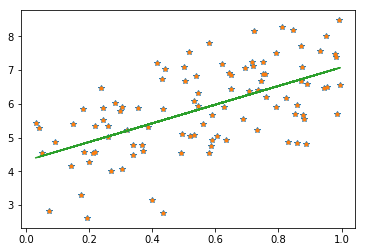

In [29]:
import matplotlib.pyplot as plt
x=np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)
plt.plot(x,y,'*')
x_b=np.c_[np.ones((100,1)),x] # add x0=1 to each instance
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
y_pred=x_b.dot(theta_best)
plt.plot(x,y,'.')
plt.plot(x,y_pred)
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.31824744]), array([[2.76660548]]))

In [31]:
eta=0.1 # Learning rate
n_iterations=1000
m=100
theta=np.random.randn(2,1)
for iteraton in range(n_iterations):
    gradiant=2/m * x_b.T.dot(x_b.dot(theta)-y)
    theta=theta-eta*gradiant
theta

array([[4.31825562],
       [2.7665915 ]])

#### Polynomial Regression
    - What if your data is actually more complex than a simple stright line?Supersingly you
    
    

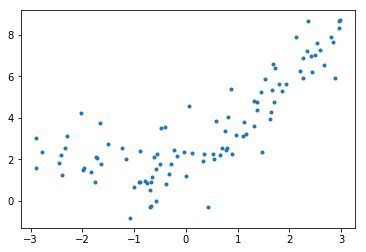

In [32]:
m=100
x=6*np.random.rand(m,1)-3
y=0.5* x**2 +x+2+np.random.randn(m,1)
plt.plot(x,y,'.')

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=4,include_bias=False)
# print(x)
x_poly=poly_features.fit_transform(x)
# print(x_poly)
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y)
lin_reg.intercept_,lin_reg.coef_


(array([1.76358677]),
 array([[ 1.00953494,  0.74694718, -0.00526395, -0.04214908]]))

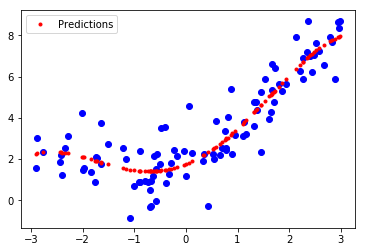

In [38]:
plt.scatter(x,y,color='b')
y_pre_poly=lin_reg.predict(poly_features.fit_transform(x))
# print(y_pre_poly)
plt.plot(x,y_pre_poly,'.',color='r',label="Predictions")
plt.legend()

In [39]:
data=pd.read_csv('https://raw.githubusercontent.com/vijaykumar10022/ML-IIIT/master/data.csv')
data

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [40]:
#Divide the dataset into two components that is x and y.
#X will contain the column between 1 and 2 .y will contain the 2 column
x=data.iloc[:,1:2].values
y=data.iloc[:,2].values
lin=LinearRegression()
lin.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

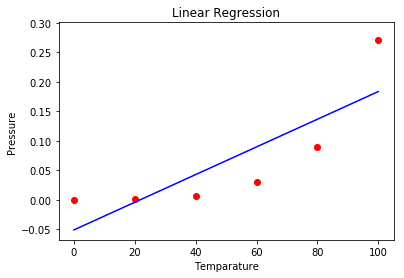

In [41]:
plt.scatter(x,y,color='r')
plt.plot(x,lin.predict(x),color='b')
plt.title("Linear Regression")
plt.xlabel("Temparature")
plt.ylabel("Pressure")
plt.show()

In [42]:
#Fitting polynomial  Regression to the dataset
poly=PolynomialFeatures(degree=4)
# print(poly)
x_poly=poly.fit_transform(x)
poly.fit(x_poly,y)
lin2=LinearRegression()
lin2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Pressure')

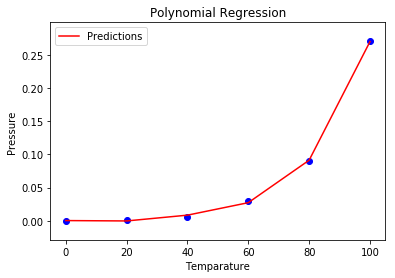

In [43]:
plt.scatter(x,y,color='b')
y_pre_poly=lin2.predict(poly.fit_transform(x))
# print(y_pre_poly)
plt.plot(x,y_pre_poly,'-',color='r',label="Predictions")
plt.legend()
plt.title("Polynomial Regression")
plt.xlabel("Temparature")
plt.ylabel("Pressure")

In [48]:
#predicting a new result with linear regression
lin.predict([[100.0]])

array([0.18333333])

In [46]:
#Predicting a new result with polynomial regression
lin2.predict(poly.fit_transform([[100]]))

array([0.26973889])

In [49]:
from sklearn.datasets import load_boston
boston_dataset=load_boston()

In [50]:
boston=pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [52]:
boston['MEDV']=boston_dataset.target


In [53]:
# Check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [54]:
from matplotlib import style

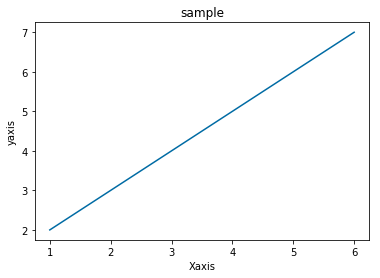

In [55]:
x=[1,2,3,4,5,6]
y=[2,3,4,5,6,7]
style.use('tableau-colorblind10')
plt.plot(x,y)
plt.xlabel("Xaxis")
plt.ylabel("yaxis")
plt.title("sample")
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


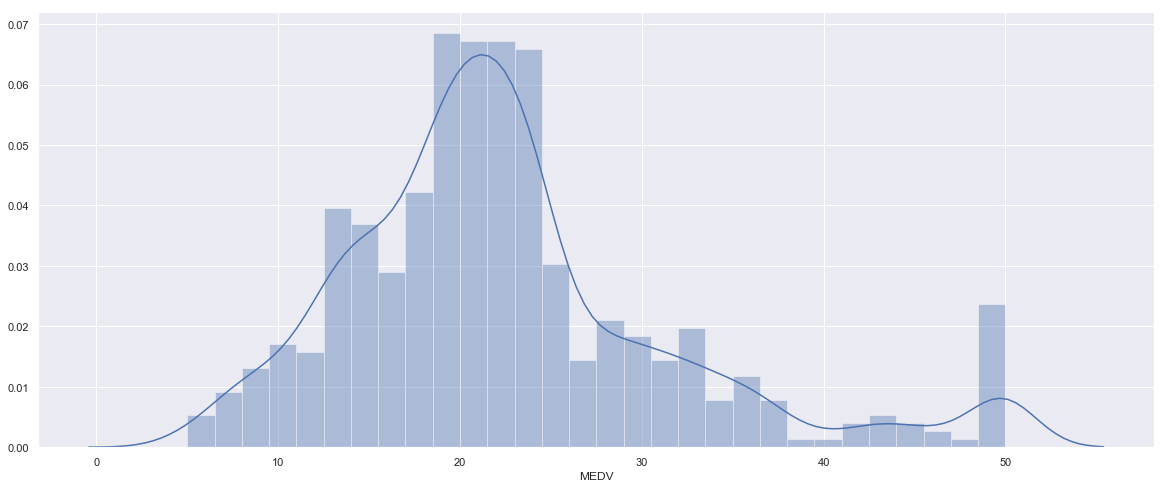

In [56]:
# sns.axes_style()
#Set the size of the figure  # as we can check from sns.axes_style()
sns.set(rc={'figure.figsize':(20,8)})
#plot z histogram showing th distribution of the target values
sns.distplot(boston['MEDV'],bins=30)#kde=False 
plt.show()

In [57]:
#Correlation Matrix
#Compute the pain wise correlation for all columns
correlation_matrix=boston.corr().round(2)
correlation_matrix
# correlation_matrix.sum()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


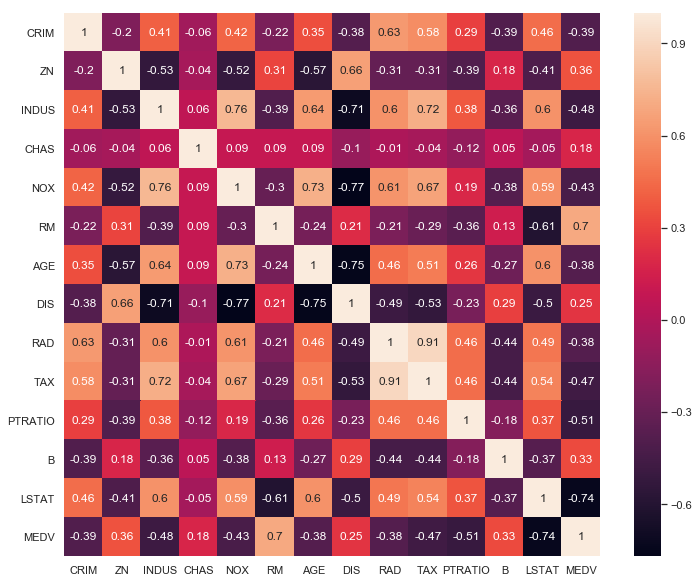

In [58]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(data=correlation_matrix,annot=True)
# sns.heatmap?

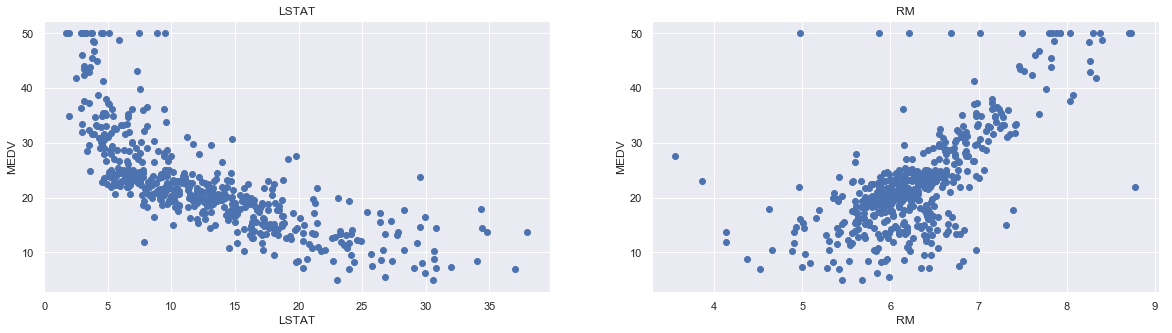

In [59]:
plt.figure(figsize=(20,5))
features=['LSTAT','RM']
target=boston['MEDV']
#Enumerate() method adds a counter to an iterable and returns 
for i,col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x=boston[col]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [61]:
#Prepare The datafor training
X=pd.DataFrame(np.c_[boston['LSTAT'],boston['RM']],columns=['LSTAT','RM'])
print(X)
Y=boston['MEDV']


     LSTAT     RM
0     4.98  6.575
1     9.14  6.421
2     4.03  7.185
3     2.94  6.998
4     5.33  7.147
5     5.21  6.430
6    12.43  6.012
7    19.15  6.172
8    29.93  5.631
9    17.10  6.004
10   20.45  6.377
11   13.27  6.009
12   15.71  5.889
13    8.26  5.949
14   10.26  6.096
15    8.47  5.834
16    6.58  5.935
17   14.67  5.990
18   11.69  5.456
19   11.28  5.727
20   21.02  5.570
21   13.83  5.965
22   18.72  6.142
23   19.88  5.813
24   16.30  5.924
25   16.51  5.599
26   14.81  5.813
27   17.28  6.047
28   12.80  6.495
29   11.98  6.674
..     ...    ...
476  18.68  6.484
477  24.91  5.304
478  18.03  6.185
479  13.11  6.229
480  10.74  6.242
481   7.74  6.750
482   7.01  7.061
483  10.42  5.762
484  13.34  5.871
485  10.58  6.312
486  14.98  6.114
487  11.45  5.905
488  18.06  5.454
489  23.97  5.414
490  29.68  5.093
491  18.07  5.983
492  13.35  5.983
493  12.01  5.707
494  13.59  5.926
495  17.60  5.670
496  21.14  5.390
497  14.10  5.794
498  12.92  6.019
499  15.10

In [62]:
#if you do not use a randomstate in traintestsplit ,every time you make the
#different set of train and test data points
#to understand random_state let us take this small example
from sklearn.model_selection import train_test_split
a,b = np.arange(10).reshape((5,2)),range(5)
# print(a)
# print(b)
print(train_test_split(a,b,random_state=1))

[array([[8, 9],
       [0, 1],
       [6, 7]]), array([[4, 5],
       [2, 3]]), [4, 0, 3], [2, 1]]


In [65]:
# Model Selection
from sklearn.model_selection import train_test_split
#split the training and test data set in 80% :20%
#assign random_state to any value .this ensure consistency
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
# print(X_train.shape)
# print(X_test.shape)
# print(X_test)
# print(Y_train.shape)
# print(Y_test.shape)
# print(Y_test)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
lin_model=LinearRegression()
lin_model.fit(X_train,Y_train)
#model Evaluation for training set
y_train_predict=lin_model.predict(X_train)
rmse=(np.sqrt(mean_absolute_error(Y_train,y_train_predict)))
r2=r2_score(Y_train,y_train_predict)
print("The Model Performance for training set")
print("--------------------------------------")
print("RSME is {}".format(rmse))
print("R2 Score is {}".format(r2))
print("\n")

#model Evaluation for testing set

y_test_predict=lin_model.predict(X_test)
#root mean square error of the model 
rmse=(np.sqrt(mean_squared_error(Y_test,y_test_predict)))
r2=r2_score(Y_test,y_test_predict)
print("The Model Performance for training set")
print("--------------------------------------")
print("RSME is {}".format(rmse))
print("R2 Score is {}".format(r2))
print("\n")

The Model Performance for training set
--------------------------------------
RSME is 2.0077638345129203
R2 Score is 0.6300745149331701


The Model Performance for training set
--------------------------------------
RSME is 5.13740078470291
R2 Score is 0.6628996975186954




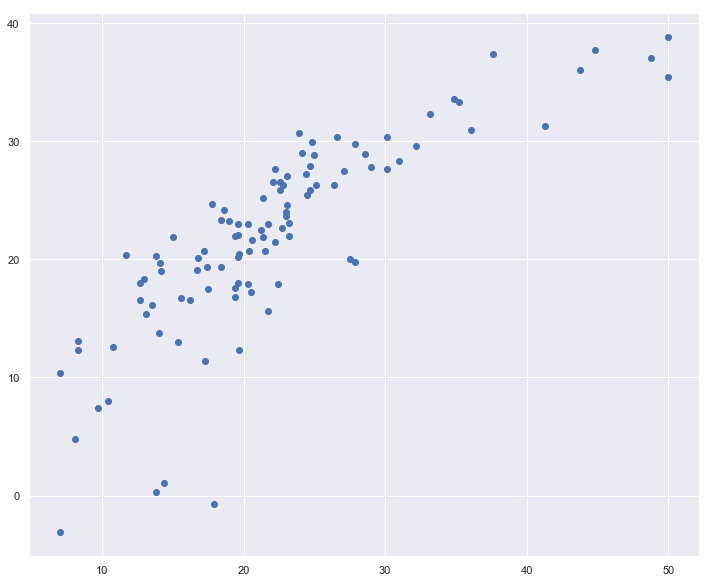

In [66]:
plt.scatter(Y_test,y_test_predict)
plt.show()

#####   Polynomial Regression

In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
# transform the features to higher degree features
X_train_poly=poly_features.fit_transform(X_train)
# fit the transformed features to linear 
poly_model=LinearRegression()
poly_model.fit(X_train_poly,Y_train)
#predicting on training data-set
y_train_predicted=poly_model.predict(X_train_poly)
#predicting on test data-set
y_test_predict=poly_model.predict(poly_features.fit_transform(X_test))

#Evaluating the model on training dataset
rmse_train=np.sqrt(mean_squared_error(Y_train,y_train_predicted))
r2_train=r2_score(Y_train,y_train_predicted)
#Evaluating the model on test dataset
rmse_test=np.sqrt(mean_squared_error(Y_test,y_test_predict))
r2_test=r2_score(Y_test,y_test_predict)
print("The model Performance for the training set")
print("-----------------------------------------")
print("RMSE of Training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
print("\n\nThe model Performace for the testing set")
print("----------------------------------------")
print("RSME of test set is {}".format(rmse_test))
print("R2 Score of test {}".format(r2_test))

The model Performance for the training set
-----------------------------------------
RMSE of Training set is 4.703071027847756
R2 score of training set is 0.7425094297364765


The model Performace for the testing set
----------------------------------------
RSME of test set is 3.784819884545026
R2 Score of test 0.8170372495892192


In [70]:
poly_model.predict(poly_features.fit_transform([[9.14, 6.421]]))

array([24.31676587])